In [ ]:
import pandas as pd

### combines the data from all 7 separate csv files into one dataframe

In [2]:
# List all your files explicitly
file_paths = [
    '2019 Handshake Job & Internship Postings.csv',
    '2020 Handshake Job & Internship Postings.csv',
    '2021 Handshake Job & Internship Postings.csv',
    '2022 Handshake Job & Internship Postings.csv',
    '2023 Handshake Job & Internship Postings.csv',
    '2024 Handshake Job & Internship Postings.csv',
    '2025 Handshake Job & Internship Postings.csv'
]

# Initialize an empty list for DataFrames
df_list = []

# Loop over the files and add year
for file in file_paths:
    df = pd.read_csv(file)
    
    # Extract the year directly from the filename
    year = int(file.split('/')[-1][:4])
    df['Year'] = year
    
    df_list.append(df)

# Combine DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Check the result
print(combined_df.head())
print(f"Combined dataframe shape: {combined_df.shape}")

                                          Jobs Title  \
0    Junior Communications Specialist - ISAC Support   
1  Data Analytics AVP - Healthcare Delivery Analy...   
2                          Outpatient Counselor III    
3  Science Communication Assistant (DHA-RA) at Pa...   
4                   Latin Academic Coach (Part-Time)   

                  Employer Name  Locations City Locations State  \
0                 Ripple Effect       Rockville        Maryland   
1          Intermountain Health  Salt Lake City            Utah   
2                LifeView Group       Pensacola         Florida   
3  Environment for the Americas  Corpus Christi           Texas   
4            Cardinal Education      Burlingame      California   

  Jobs Created At Date Job Type Name  Year  
0           2019-12-30           Job  2019  
1           2019-12-30           Job  2019  
2           2019-12-30           Job  2019  
3           2019-12-30    Internship  2019  
4           2019-12-30           Jo

In [3]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440957 entries, 0 to 1440956
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Jobs Title            1440948 non-null  object
 1   Employer Name         1440951 non-null  object
 2   Locations City        1410718 non-null  object
 3   Locations State       1403315 non-null  object
 4   Jobs Created At Date  1440957 non-null  object
 5   Job Type Name         1440957 non-null  object
 6   Year                  1440957 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 77.0+ MB
None


### data cleaning

In [4]:
combined_df.rename(columns={
    'Jobs Title': 'job_title',
    'Employer Name': 'employer_name',
    'Locations City': 'city',
    'Locations State': 'state',
    'Jobs Created At Date': 'job_post_date',
    'Job Type Name': 'job_type',
    'Year': 'year'
}, inplace=True)


In [5]:
combined_df.isnull().sum()
combined_df.dropna(subset=['job_title', 'city', 'state'], inplace=True)

### filtering data science related roles

In [6]:
keywords = ['Data Scientist', 'Data Analyst', 'Machine Learning', 'AI', 
            'Data Engineer', 'Analytics', 'Business Intelligence', 
            'Statistician', 'NLP', 'Deep Learning', 'IT','Data Science', 'UX','Research Analyst','Analyst']

pattern = '|'.join(keywords)

ds_jobs = combined_df[combined_df['job_title'].str.contains(pattern, case=False, na=False)]

print(f"Total Data Science roles identified: {len(ds_jobs)}")


Total Data Science roles identified: 444040


### Trend Analysis - Yearly Hiring Trends

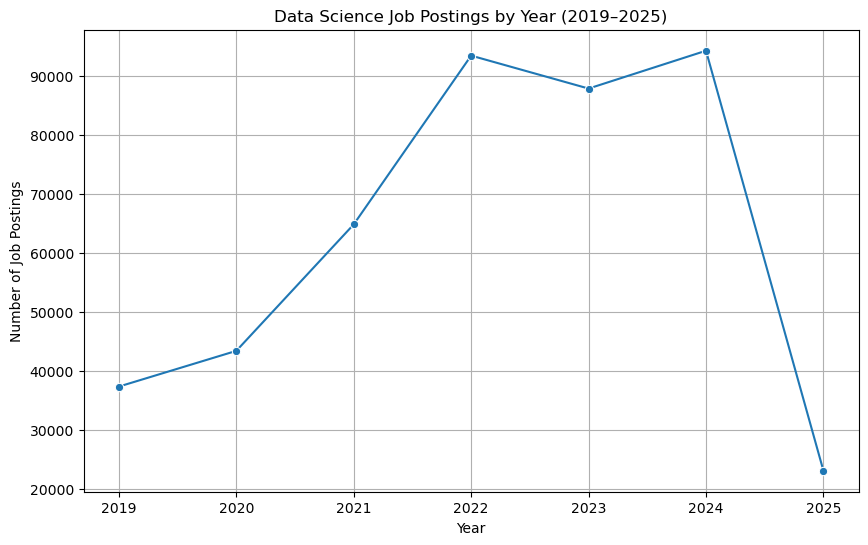

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

yearly_counts = ds_jobs.groupby('year').size()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Data Science Job Postings by Year (2019–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


### Regional Hiring Patterns

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_18941/3217229954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='magma')


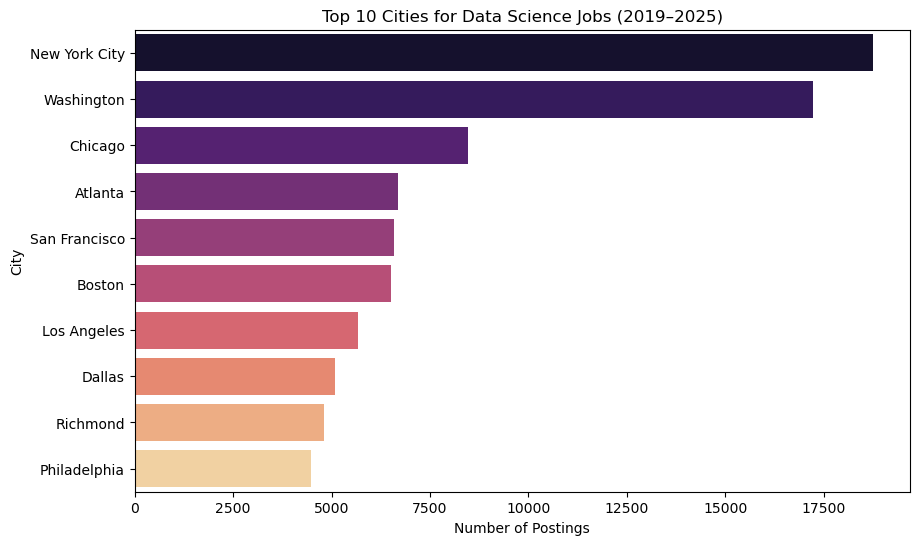

In [8]:
top_cities = ds_jobs['city'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='magma')
plt.title('Top 10 Cities for Data Science Jobs (2019–2025)')
plt.xlabel('Number of Postings')
plt.ylabel('City')
plt.show()


/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_18941/3868768998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states.index, x=top_states.values, palette='coolwarm')


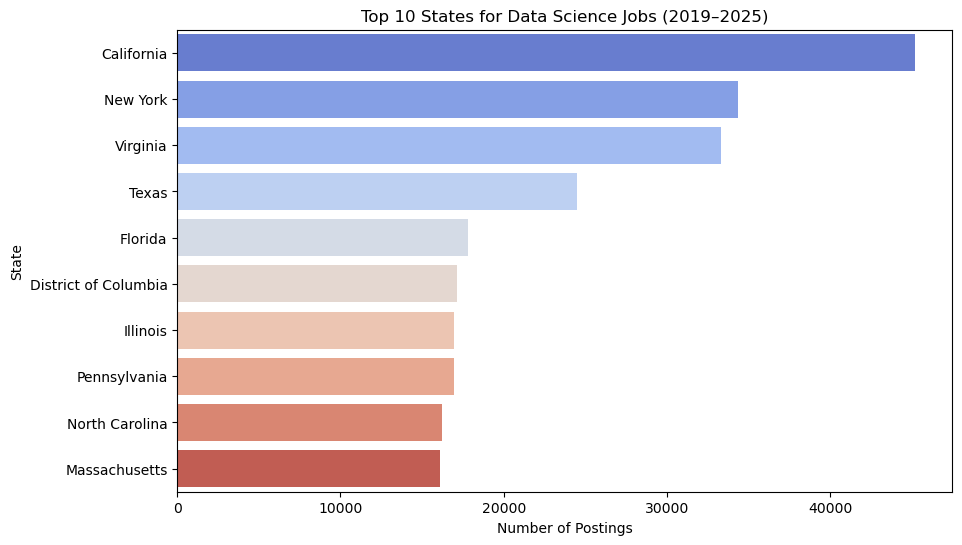

In [9]:
top_states = ds_jobs['state'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_states.index, x=top_states.values, palette='coolwarm')
plt.title('Top 10 States for Data Science Jobs (2019–2025)')
plt.xlabel('Number of Postings')
plt.ylabel('State')
plt.show()


### Impact of Covid and tech layoffs

In [11]:
# Define periods specifically for data science jobs
pre_covid_ds = ds_jobs[ds_jobs['year'] == 2019]
covid_period_ds = ds_jobs[(ds_jobs['year'] >= 2020) & (ds_jobs['year'] <= 2021)]
tech_layoffs_period_ds = ds_jobs[(ds_jobs['year'] >= 2022) & (ds_jobs['year'] <= 2023)]
post_event_period_ds = ds_jobs[ds_jobs['year'] >= 2024]

# Calculate average postings per year for data science jobs
print("Average Data Science postings per year:")
print(f"Pre-COVID (2019): {len(pre_covid_ds)}")
print(f"COVID period (2020-2021): {len(covid_period_ds)/2}")
print(f"Tech layoffs period (2022-2023): {len(tech_layoffs_period_ds)/2}")
print(f"Post-event period (2024-2025): {len(post_event_period_ds)/2}")


Average Data Science postings per year:
Pre-COVID (2019): 37321
COVID period (2020-2021): 54090.5
Tech layoffs period (2022-2023): 90619.0
Post-event period (2024-2025): 58650.0


### Map viz

In [15]:
import plotly.express as px

# State abbreviations mapping
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Map full state names to abbreviations
location_counts = ds_jobs.groupby(['city', 'state']).size().reset_index(name='job_count')
location_counts['state_abbrev'] = location_counts['state'].map(us_state_abbrev)

# Drop any rows with unmapped states (if any)
location_counts.dropna(subset=['state_abbrev'], inplace=True)

# Now create the plot correctly
fig = px.scatter_geo(location_counts,
                     locations='state_abbrev',
                     locationmode='USA-states',
                     hover_name='city',
                     size="job_count",
                     projection="albers usa",
                     title='Geographical Distribution of Data Science Jobs (2019–2025)')

fig.update_layout(geo_scope='usa')
fig.show()


### ratios of internships vs jobs

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_18941/3927224534.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




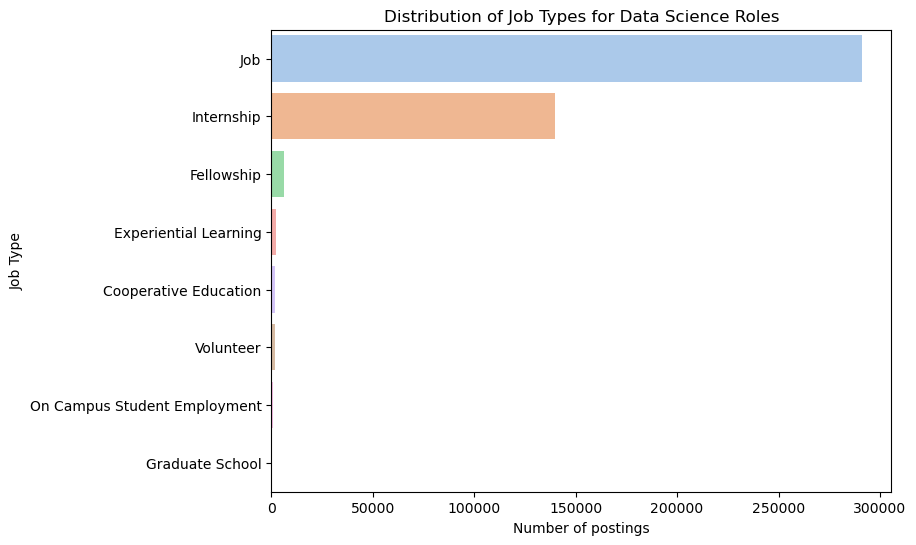

Job Type Ratios:
job_type
Job                             0.655331
Internship                      0.314951
Fellowship                      0.014395
Experiential Learning           0.004840
Cooperative Education           0.004495
Volunteer                       0.003837
On Campus Student Employment    0.001446
Graduate School                 0.000705
Name: count, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Job type distribution
job_type_counts = ds_jobs['job_type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(y=job_type_counts.index, x=job_type_counts.values, palette='pastel')
plt.title('Distribution of Job Types for Data Science Roles')
plt.xlabel('Number of postings')
plt.ylabel('Job Type')
plt.show()

# Calculate ratios
job_type_ratio = job_type_counts / job_type_counts.sum()
print("Job Type Ratios:")
print(job_type_ratio)


### seasonal hiring pattern

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_18941/515035104.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_18941/515035104.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



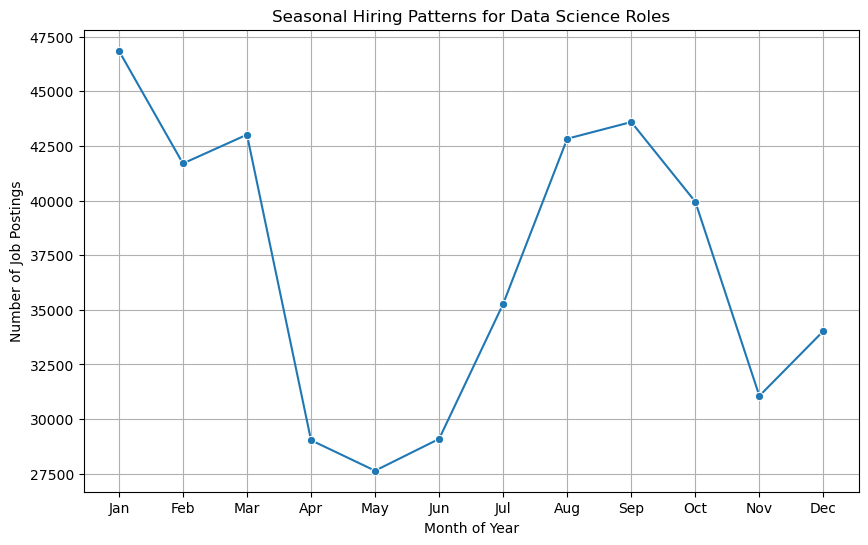

In [14]:
# Convert job_post_date to datetime format
ds_jobs['job_post_date'] = pd.to_datetime(ds_jobs['job_post_date'], errors='coerce')

# Extract month from job_post_date
ds_jobs['month'] = ds_jobs['job_post_date'].dt.month

monthly_counts = ds_jobs['month'].value_counts().sort_index()

# Plot seasonal hiring patterns
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Seasonal Hiring Patterns for Data Science Roles')
plt.xlabel('Month of Year')
plt.ylabel('Number of Job Postings')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                      'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()
